In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [28]:
data = unp.uarray([13.4, 13.6, 17.7, 42.0, 24.8, 30.4, 27.1, 24.6, 22.8, 8.75, 29.9, 41.3, 51.5, 56.3, 27.7, 34.2, 50.3], 17*[0.001]) * 1e-6


# Constants
q_0_theor = 1.6022e-19
g = 9.807
p = 102e5
T = 273.15 + 23
M_zr = 28.96 # kg/kmol
R = 8314 # J/K kmol 
rho_zr = p*M_zr / (R*T)
nu_zr = 18.3e-6

rho = 973
d = unp.uarray([5e-3], [0.1e-3])
U = 154

In [32]:
r1 = unp.sqrt(( 9 * nu_zr * data ) / (2 * (rho - rho_zr) * g))

E = U / d

q1 = (4 * np.pi * r1 ** 3 * (rho - rho_zr) * g) / (3 * E)

data1 = np.array([unp.nominal_values(data) * 1e6, unp.nominal_values(r1) * 1e8, unp.nominal_values(q1 / q_0_theor)]).T

print(a2l.to_ltx(data1, frmt='{:6.1f}', arraytype='array'))

\begin{array}
    13.4 &    36.3 &     0.3\\
    13.6 &    36.6 &     0.3\\
    17.7 &    41.7 &     0.5\\
    42.0 &    64.3 &     1.9\\
    24.8 &    49.4 &     0.9\\
    30.4 &    54.7 &     1.2\\
    27.1 &    51.6 &     1.0\\
    24.6 &    49.2 &     0.8\\
    22.8 &    47.4 &     0.8\\
     8.8 &    29.3 &     0.2\\
    29.9 &    54.3 &     1.1\\
    41.3 &    63.8 &     1.8\\
    51.5 &    71.2 &     2.6\\
    56.3 &    74.4 &     2.9\\
    27.7 &    52.2 &     1.0\\
    34.2 &    58.0 &     1.4\\
    50.3 &    70.4 &     2.5
\end{array}
None


In [26]:
U2 = 138

E2 = U2/d

v_p = unp.uarray([70.1, 67.8, 73.0, 68.7, 59.7, 72.0, 63.7, 67.5, 65.67, 70.5, 72.8, 99.6, 103.4, 106.1, ], 14 * [0.001]) * 1e-6

v_m = unp.uarray([23.8, 26.4, 34.2, 29.2, 14.5, 56.8, 23.0, 4.6, 26.37, 0.7, 1.2, 37.4, 39.2, 18.0], 14 * [0.001]) * 1e-6



r2 = unp.sqrt(9 * nu_zr * (v_p - v_m) / (4 * g * (rho - rho_zr)))

q2 = 3 * np.pi * r2 * nu_zr * (v_p + v_m) / E2

data2 = np.array([unp.nominal_values(v_p) * 1e6, unp.nominal_values(v_m) * 1e6, unp.nominal_values(r2) * 1e8, unp.nominal_values(q2 / q_0_theor)]).T

print(a2l.to_ltx(data2, frmt='{:6.1f}', arraytype='array'))

\begin{array}
    70.1 &    23.8 &    47.7 &     1.7\\
    67.8 &    26.4 &    45.1 &     1.7\\
    73.0 &    34.2 &    43.7 &     1.8\\
    68.7 &    29.2 &    44.1 &     1.7\\
    59.7 &    14.5 &    47.2 &     1.4\\
    72.0 &    56.8 &    27.4 &     1.4\\
    63.7 &    23.0 &    44.8 &     1.5\\
    67.5 &     4.6 &    55.6 &     1.6\\
    65.7 &    26.4 &    44.0 &     1.6\\
    70.5 &     0.7 &    58.6 &     1.6\\
    72.8 &     1.2 &    59.4 &     1.7\\
    99.6 &    37.4 &    55.3 &     3.0\\
   103.4 &    39.2 &    56.2 &     3.1\\
   106.1 &    18.0 &    65.8 &     3.2
\end{array}
None


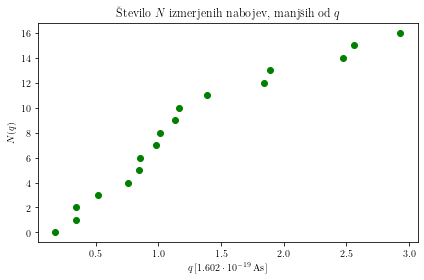

In [5]:
N = np.arange(len(q1))
q1.sort()

fig, ax = plt.subplots(1, 1)

ax.plot(unp.nominal_values(q1) / q_0_theor, N, color='green', linestyle='', marker='o')

ax.set_title(f'Število $N$ izmerjenih nabojev, manjših od $q$')
ax.set_xlabel(r'$q\,[1.602 \cdot 10^{-19}\,\mathrm{As}]$')
ax.set_ylabel(r'$N(q)$')
#ax.set_ylim(0, 15)
#ax.grid(which='both', linestyle=':', axis='both')
#ax.legend()
fig.tight_layout()
fig.savefig(f'1metoda.pdf')

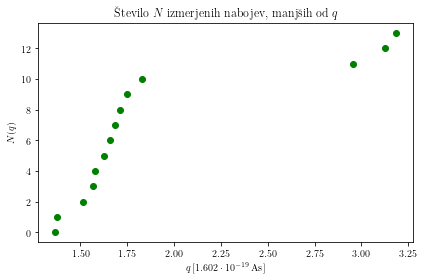

In [6]:
N = np.arange(len(q2))
q2.sort()

fig, ax = plt.subplots(1, 1)

ax.plot(unp.nominal_values(q2) / q_0_theor, N, color='green', linestyle='', marker='o')

ax.set_title(f'Število $N$ izmerjenih nabojev, manjših od $q$')
ax.set_xlabel(r'$q\,[1.602 \cdot 10^{-19}\,\mathrm{As}]$')
ax.set_ylabel(r'$N(q)$')
#ax.set_ylim(0, 15)
#ax.grid(which='both', linestyle=':', axis='both')
#ax.legend()
fig.tight_layout()
fig.savefig(f'2metoda.pdf')